In [ ]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sys
sys.path.append('..')

In [ ]:
import fetch_missing_chirps_files as fmcf
import chcfetch.constants
import read_tifs_create_met as rtcm

In [ ]:
YEARS = [2019, 2020, 2021, 2022, 2023]

In [ ]:
GEOGLAM_CHIRPS_FOLDERPATH = '../../../../nh_crop_calendar/crop_calendar/data/cluster_files/chirps/'
CHC_CHIRPS_DOWNLOAD_FOLDERPATH = '../../../../nh_crop_calendar/crop_calendar/data/chc/chirps-v2.0/p05/'

In [ ]:
os.path.exists('../../../../nh_crop_calendar/crop_calendar/data/chc/chirps-v2.0/p05/chirps-v2.0.2020.07.15.tif')

In [ ]:
CHIRPS_REF_TIF_FILEPATH = '../../../../nh_crop_calendar/crop_calendar/data/chc/chirps-v2.0/p05/chirps-v2.0.2020.07.15.tif'

In [ ]:
chirps_bounds_gdf = gpd.read_file(chcfetch.constants.CHIRPS_V2_P50_BOUNDS_GEOJSON_FILEPATH)

In [ ]:
chirps_bounds_gdf

In [ ]:
eth_gdf = gpd.read_file('../../../../ethiopia/data/Eth_Woreda_2013_UTM/Eth_Woreda_2013_UTM.shp')

In [58]:
eth_gdf.to_crs('epsg:4326').iloc[[eth_gdf.area.argmin()]]

,OBJECTID,REGIONNAME,ZONENAME,WOREDANAME,REG_P_CODE,ZON_P_CODE,WOR_P_CODE,REG_Pcode,HRname,HRpcode,HRparent,DRMF_Name,geometry
5,6,Addis Ababa,Region 14,Addis Ketema,14,1401,140108,ET14,Addis Ketema,ET140108,ET1401,None,"POLYGON ((38.73579 9.04858, 38.7359 9.04385, 3..."


In [ ]:
smallest_zone_gdf = eth_gdf.to_crs('epsg:4326').iloc[[eth_gdf.area.argmin()],].reset_index(drop=True)

In [ ]:
smallest_zone_gdf['geometry'][0]

In [ ]:
smallest_zone_gdf.to_file('../data/eth_smalled_shape.geojson')

In [ ]:
smallest_zone_gdf.within(chirps_bounds_gdf['geometry'][0])

In [ ]:
catalogue_df = fmcf.fetch_missing_chirps_v2p0_p05_files(
    years = YEARS,
    geoglam_chirps_data_folderpath = GEOGLAM_CHIRPS_FOLDERPATH,
    chc_chirps_v2_0_p05_download_folderpath = CHC_CHIRPS_DOWNLOAD_FOLDERPATH,
    # njobs = njobs,
    # overwrite = overwrite,
    # tif_filepath_col = tif_filepath_col,
)

In [ ]:
catalogue_df['filetype'].value_counts()

In [ ]:
catalogue_df

In [ ]:
ref_tif_filepath = catalogue_df[catalogue_df[fmcf.FILETYPE_COL] == fmcf.TIF_EXT][fmcf.TIF_FILEPATH_COL].loc[0]

In [ ]:
catalogue_df[rtcm.METHOD_COL] = rtcm.LoadTIFMethod.READ_AND_CROP
catalogue_df.loc[
    catalogue_df[fmcf.FILETYPE_COL] == fmcf.TIF_GZ_EXT,
    rtcm.METHOD_COL
] = rtcm.LoadTIFMethod.COREGISTER_AND_CROP

In [ ]:
catalogue_df['method'].value_counts()

In [ ]:
(3*60 + 15.1) / 39.2

In [ ]:
# njobs = 8 -> 39.2s
# njobs = 1 -> 3m 15.1s

updated_catalogue_df = rtcm.read_tifs_get_agg_value(
    shapes_gdf = smallest_zone_gdf,
    catalogue_df = catalogue_df,
    val_col = 'mean chirps',
    reference_tif_filepath = ref_tif_filepath,
    # njobs = 1,
)

In [ ]:
list(zip([1,2,3], [2,3,4], [3,4,5]))

In [ ]:
scale = 5
aspect_ratio = 3
fig, ax = plt.subplots(figsize=(scale*aspect_ratio, scale))
sns.lineplot(
    ax = ax,
    data = updated_catalogue_df,
    x = 'date',
    y = 'mean chirps',
)

In [ ]:
updated_catalogue_df

In [ ]:
list(range(2020, 2020+1))

In [ ]:
"""
- roi_shapefile
- start_year
- end_year
- geoglam_chirps_folderpath
- chc_chirps_download_folderpath
- reference_tif_filepath
- aggregation
- njobs
- export_filepath
"""

(
    "./data/eth_smalled_shape.geojson "
    "2019 "
    "2023 "
    "../../../nh_crop_calendar/crop_calendar/data/cluster_files/chirps/ "
    "../../../nh_crop_calendar/crop_calendar/data/chc/chirps-v2.0/p05 "
    "../../../nh_crop_calendar/crop_calendar/data/chc/chirps-v2.0/p05/chirps-v2.0.2020.07.15.tif "
    "mean "
    "-1 "
    "./data/test_out.csv"
)

In [51]:
import pandas as pd

In [52]:
out_df = pd.read_csv('../data/test_out.csv')

In [53]:
out_df

,date,year,day,mean CHIRPS
0,1982-01-01,1982,1,409.5
1,1982-01-02,1982,2,0.0
2,1982-01-03,1982,3,0.0
3,1982-01-04,1982,4,0.0
4,1982-01-05,1982,5,0.0
...,...,...,...,...
15907,1981-12-27,1981,361,0.0
15908,1981-12-28,1981,362,0.0
15909,1981-12-29,1981,363,0.0
15910,1981-12-30,1981,364,5.0


In [54]:
import datetime

In [55]:
out_df['date'] = out_df['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

Text(0.5, 1.0, 'Addis Ketema, Ethiopia, mean CHIRPS, 1981 - present')

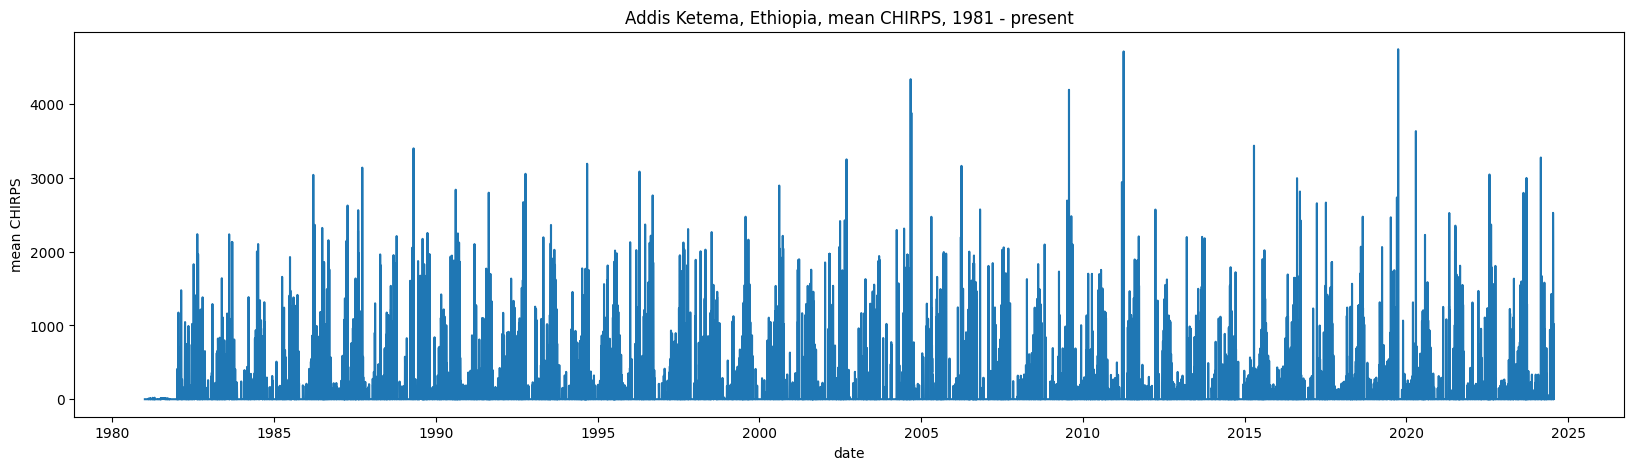

In [60]:
scale = 5
aspect_ratio = 4
fig, ax = plt.subplots(figsize=(scale*aspect_ratio, scale))
sns.lineplot(
    ax = ax,
    data = out_df,
    x = 'date',
    y = 'mean CHIRPS',
)
ax.set_title('Addis Ketema, Ethiopia, mean CHIRPS, 1981 - present')